In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import nawrapper as nw
import pymaster as nmt
import numpy as np
import matplotlib.pyplot as plt
from pixell import enmap, enplot

In [3]:
data_root = '/tigress/zequnl/cmb/data/'

apopath = data_root + '/from_choi/apo_mask/deep56_c7v5_car_190220_rect_master_apo_w0.fits'
apo = enmap.read_map(apopath)

We use `enmap.extract` to get maps which all match the WCS and shape defined by `apo`, since in most situations you want your maps and masks to line up.

In [25]:
# run enmap.extract to get steve's mask on the apodized region
mapname_head = data_root + "/from_choi/maps/filtered/ACTPol_148_deep56_pa1_f150_s14_4way_split"
raw_map = enmap.read_map(f"{mapname_head}{0}_srcadd_I_filt_unpixwin.fits")
steve_map = enmap.extract(raw_map, apo.shape, apo.wcs) 

# enmap.extract from simone's directory on niagara
simone_map_file = data_root + 'ACTPol_148_D56_PA1_S2_4way_split0_I_src_free.fits'
true_map_raw = enmap.read_fits(simone_map_file)
true_map = enmap.extract(true_map_raw, apo.shape, apo.wcs)

# Overplot a y-slice 
We plot the same apodized cut in the mask. We are comparing

1. Extracted map from the raw map.
2. Steve's filtered map's WCS.

Thus we expect the large scale features to be different.

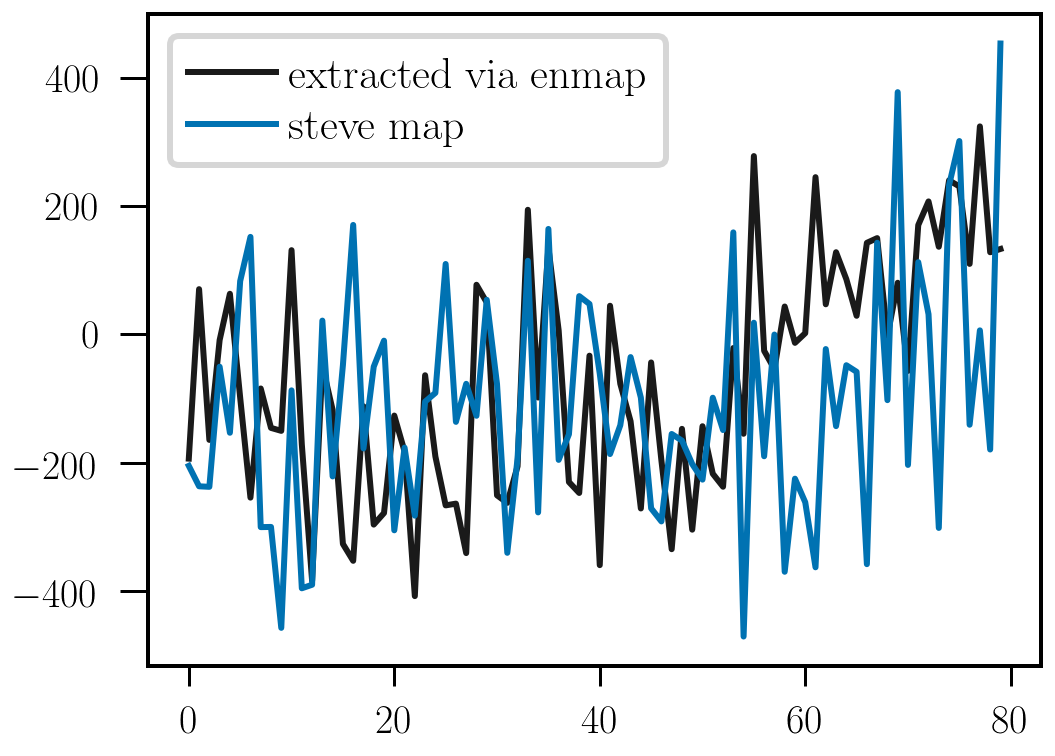

In [26]:
plt.figure(figsize=(8,6))
plt.plot( true_map[700-40:700+40, 3000], label='extracted via enmap' )
plt.plot( steve_map[700-40:700+40, 3000], label='steve map' )
plt.legend(frameon=True)

# offset steve mask
We now offset steve maps by 1,1 and see that the features line up.

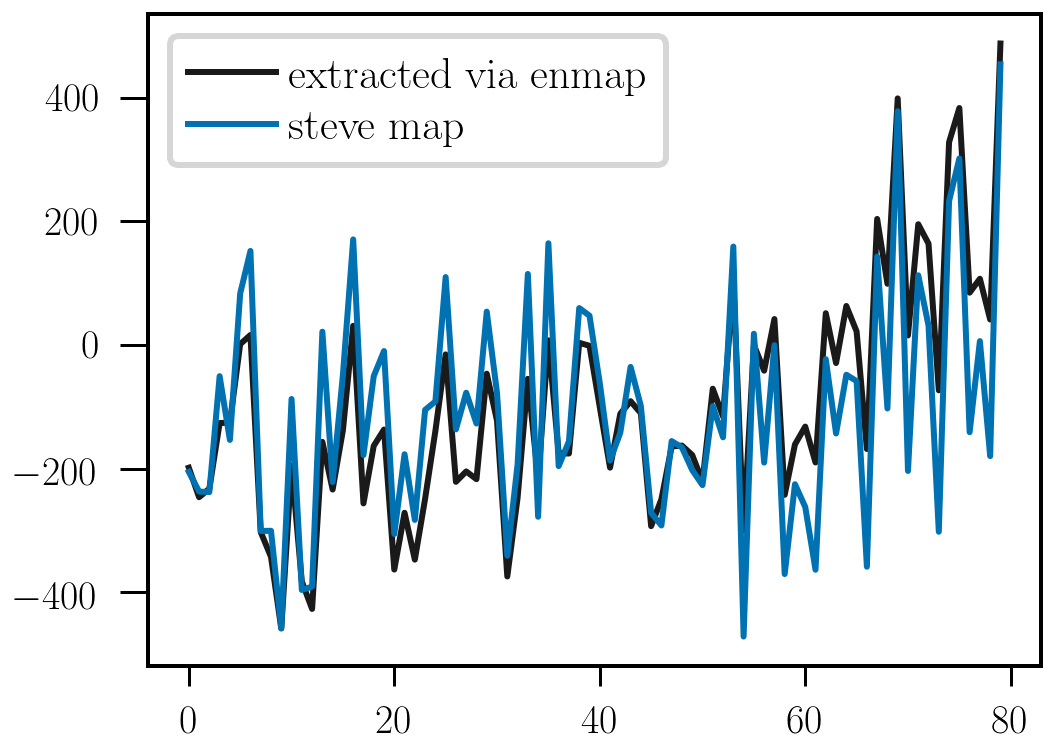

In [37]:
xoffset, yoffset = -1, -1
plt.figure(figsize=(8,6))
plt.plot( true_map[700-40+xoffset:700+40+xoffset, 3000 + yoffset], 
         label='extracted via enmap' )
plt.plot( steve_map[700-40:700+40, 3000], label='steve map' )
plt.legend(frameon=True)